In [2]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

In [3]:
data = 'petrol_consumption.csv'
cons = pd.read_csv(data)
cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Дослідження даних

In [4]:
cons.shape

(48, 5)

In [5]:
cons.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


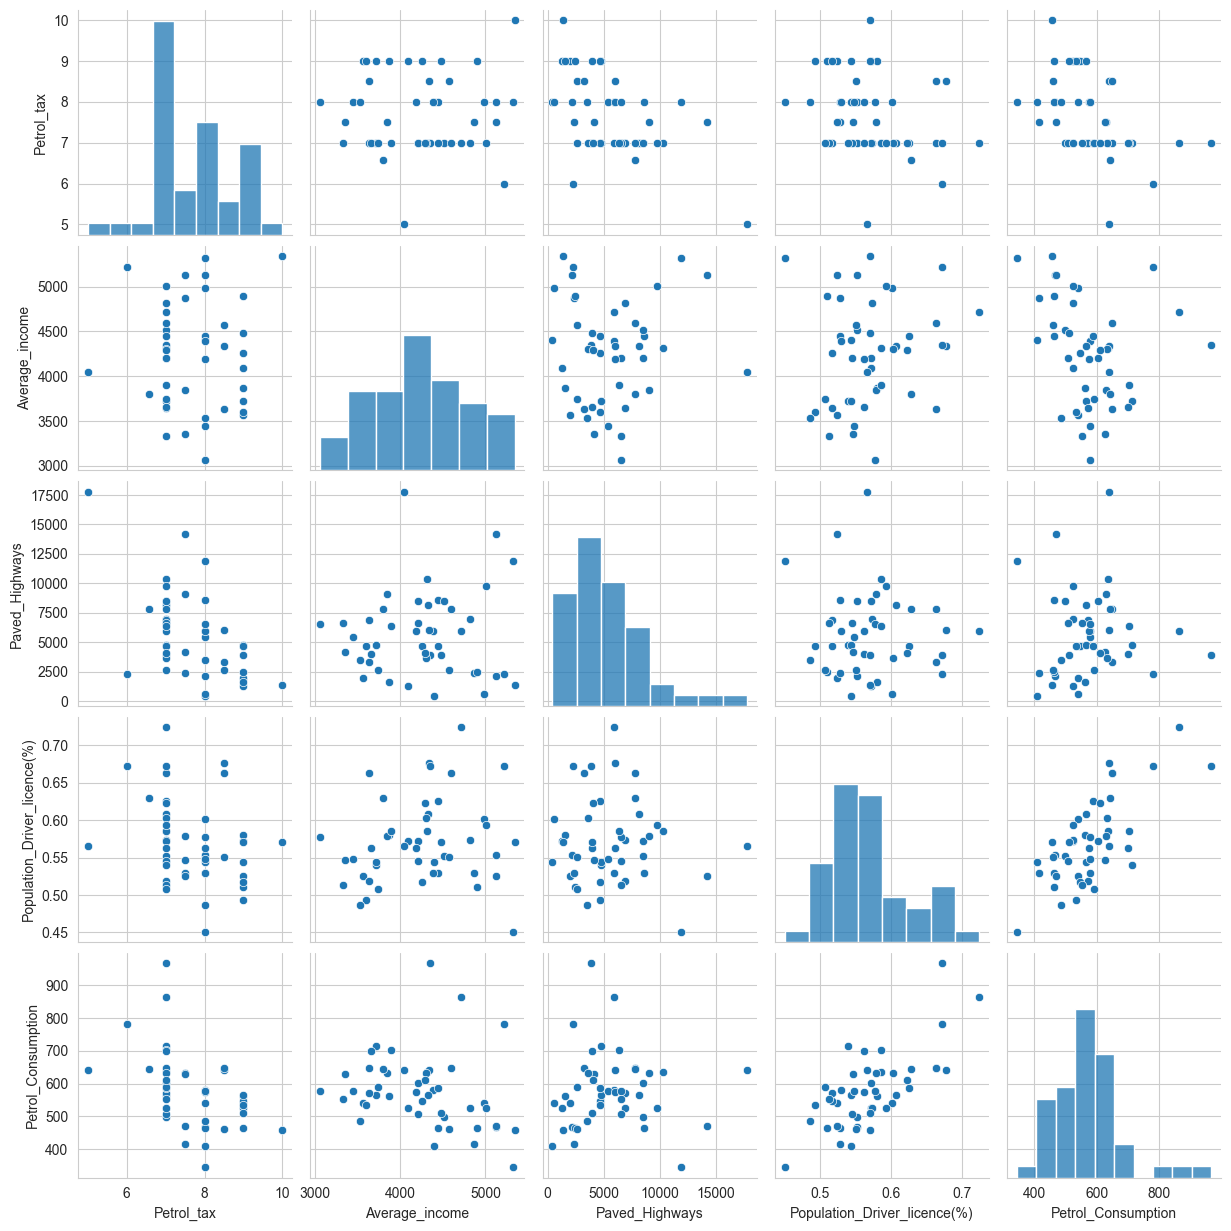

In [6]:
sb.pairplot(cons)

In [7]:
correlations = cons.corr()
correlations

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Correlation berween parameters')]

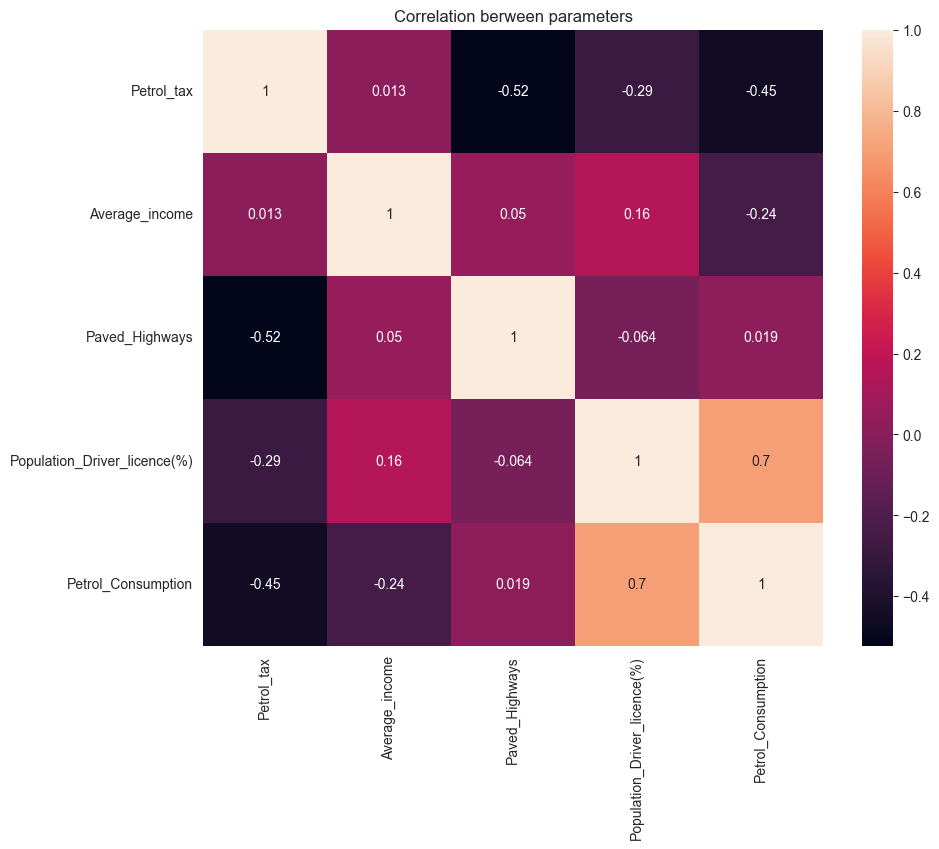

In [8]:
sb.heatmap(correlations, annot=True).set(title='Correlation berween parameters')

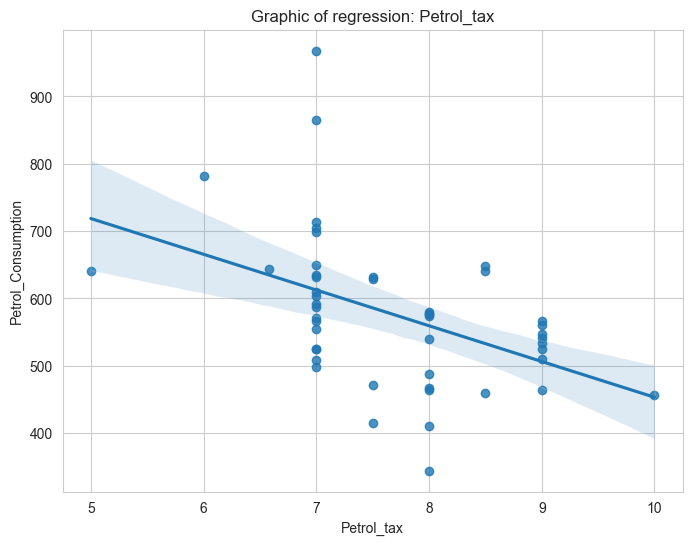

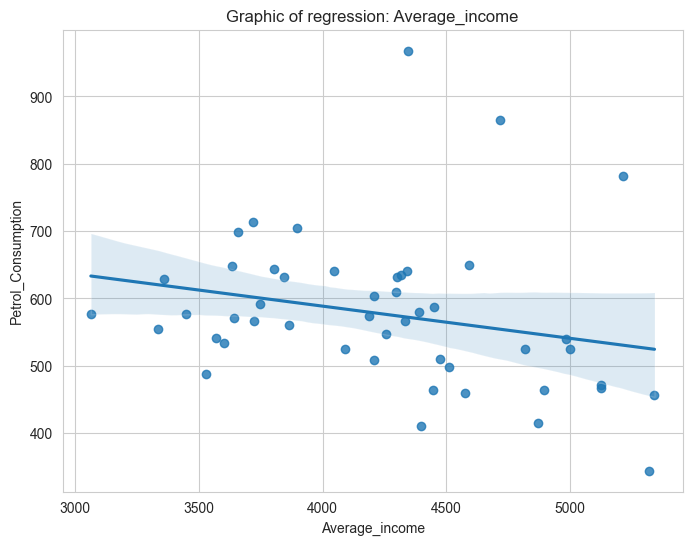

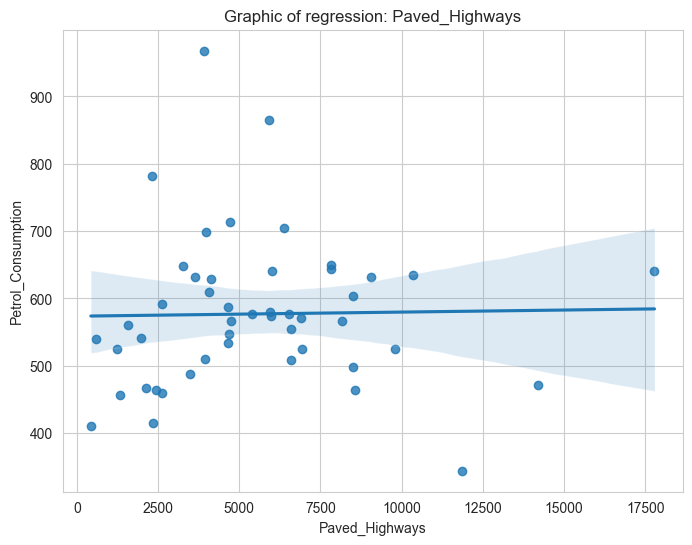

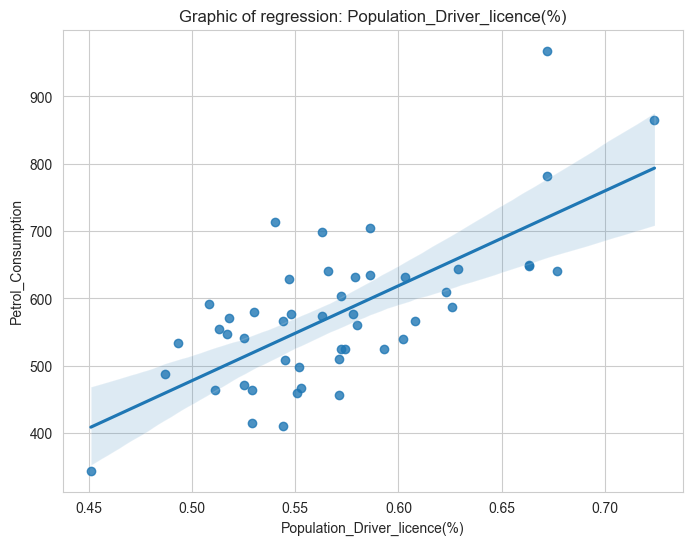

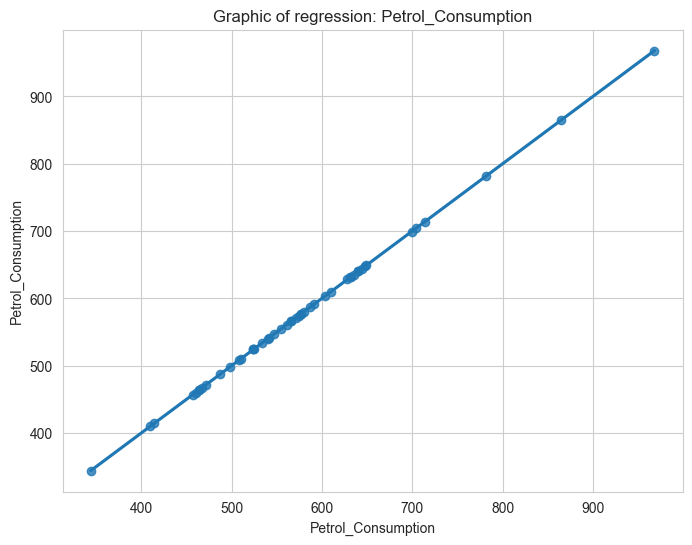

In [9]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption']

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y='Petrol_Consumption', data=cons).set(title=f'Graphic of regression: {var}')


In [10]:
y = cons['Petrol_Consumption']
X = cons[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]

In [11]:
SEED = 48
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)
X.shape

(48, 4)

In [12]:
LinReg = LinearRegression()

LinReg.fit(X_train, y_train)


LinearRegression()

In [13]:
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)

intercept:  344.58590039674596
slope:  [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]


# Вводимо прогнозні дані

In [14]:
y_pred = LinReg.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
result

,Actual,Predict
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE:{mae}\nMSE: {mse}\nRMSE: {rmse}')

MAE:58.481804761252974
MSE: 3983.8451936821657
RMSE: 63.117709033853295


In [16]:
LinReg.score(X_test, y_test)

0.42818683491379905

In [17]:
LinReg.score(X_train, y_train)

0.6895815278628233

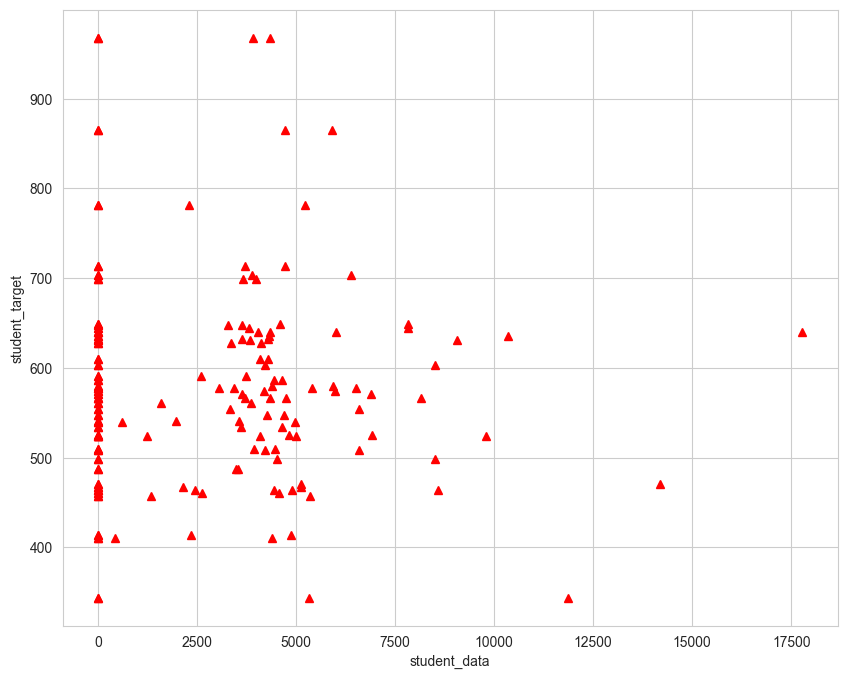

In [29]:
plt.plot(X, y, 'r^')
plt.xlabel('student_data')
plt.ylabel('student_target')
plt.show()

## Висновок

Дана модель може використовуватися для прогнозування з певною достовірністю, проте для її покращення доцільно поширити вибірку даних.